# Analyzing Songs through Data: Trends in Spotify and Music

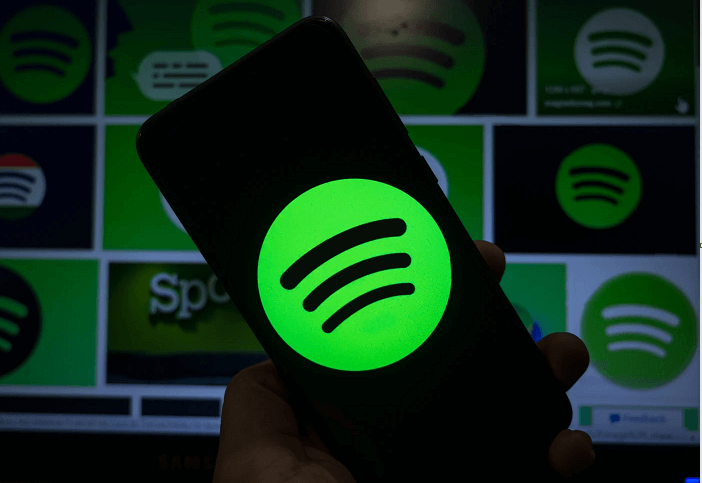

## Introduction to Data Science and Music



<br>

   Spotify is infamous for its data collection of its users. Spotify is actually extremely invest in data science and analytics to create the perfect algorithm to entice listeners and show them new music they may have not tried before. One of the most celebrated aspects of Spotify is its Spotify Wrapped, a viral marketing campaign that shows users their listening experience throughout the year and analyzes the most played songs, genres, and their top singers. 
    
   This type of data analysis intrigued me, and I asked the question: What if we can see general trends in music throughout the years from Spotify? Or, even further, what can we glean from changes in music over time, from the technicality of tempo and intensity of its volume to more qualitative variables, such as danceability and emotionality? Thus, my main question in regards to this is: **What can we analyze based on Spotify's collection of data, and how can that paint a picture of different variables and their relationships?** This can be as broad as the most prominent genres to the changes over time of music. 
    
   While this question may seem innocuous, in truth, it is actually a very useful question to understand the different trends of music today, and is important for musical industries for predicting the next big musical "trend" or "hit." Analyzing musical trends over is very beneficial to understanding the culture of a time as well: much like how we can understand history through looking at the fashion of the period, we can look at musical structure and popularity throughout the years to understand a history, culture, or people. Thus, even when we look at popular songs on Spotify, we can get a glimpse for the general population's musical tastes and trends.
    
   My data was collected through Kaggle, an online data sharing site for data analysts and machine learners. Users can publish data sets and submit code for others to view. The link for the data set, which is labelled Spotify - All Time Top 2000s Mega Dataset, is found here: https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset
   
  In addition, I'll try to use some machine learning to simulate the Spotify algorithm as well!
   
   The data sets columns are as follows: 
- Index: Numeric ID
- Title: Name of the Track. 
- Artist: Name of the Artist. 
- Top Genre: Genre of the track. 
- Year: Release Year of the track. 
- Beats per Minute(BPM): The tempo of the song. 
- Energy: The energy of a song - the higher the value, the more energtic a song is.
- Danceability: The higher the value, the easier it is to dance to this song.
- Loudness: The higher the value, the louder the song.
- Valence: The higher the value, the more positive mood for the song.
- Length: The duration of a song in seconds. 
- Acoustic: The higher the value the more acoustic a song is; acoustics refer to the physical aspects of music, but in a general sense refers to the way the music produces sound. 
- Speechiness: The higher the value the more spoken words the song contains
- Popularity: The higher the value the more popular a song is based on a scale of 0-100, 0 being not popular to 100 being very popular
 

With all of that out of the way, let's start wrangling the data for use in analysis! 
<br>


## Data wrangling: What aspects should be cleaned up? 


Here, I am importing the data and all necessary applications. I'm also setting the theme for Seaborn to make it consistent for every graph. Let's take a look at the data we have! 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

In [181]:
music_df = pd.read_csv("Spotify-2000.csv")

music_df.head(3)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


In [3]:
print(music_df.shape) #Printing the shape of the dataset

(1994, 15)


In [4]:
music_df.isnull().sum() #Checking to see if we have any NaN values 

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
#checking for the count of unique values for each column
music_df.nunique()

Index                     1994
Title                     1958
Artist                     731
Top Genre                  149
Year                        63
Beats Per Minute (BPM)     145
Energy                      98
Danceability                84
Loudness (dB)               23
Liveness                    94
Valence                     97
Length (Duration)          350
Acousticness               100
Speechiness                 37
Popularity                  81
dtype: int64

And here are all the unique values in the data set! What I notice right away is the amount of genres for the data set. There are 149 unique genres, and that's most likely because of genres intermixing with one another, or having a different name, but actually being in the same genre. What I am going to do for the sake of easier analysis is only keep the last word of the values in Top Genre. That way, we can at least make it easier for us to analyze on a base level. 

In [6]:
music_df['Top Genre'] = music_df['Top Genre'].apply(lambda x: x.split()[-1]) #Lambda is like a smaller function 

In [7]:
music_df["Top Genre"].nunique()

68

We did it! That way, when we later calculate trends in genre, it won't give us as many outliers as before. 

Next, I'm going to also reduce the popularity to only those with a score of 50 or higher. This is also to reduce outliers in the data set. 

In [8]:
newmusic_df = music_df[music_df["Popularity"]>=50]
newmusic_df.nunique()

Index                     1495
Title                     1471
Artist                     572
Top Genre                   58
Year                        63
Beats Per Minute (BPM)     139
Energy                      98
Danceability                84
Loudness (dB)               22
Liveness                    83
Valence                     97
Length (Duration)          316
Acousticness               100
Speechiness                 36
Popularity                  42
dtype: int64

## Data Visualizations and Analyses of the Top Songs on Spotify
 

Now that our data is better suited for visualization and analysis, I want to first start off by describing the different statistics of the data. This is very simple; I am simply just looking for general statistics of the different numerical values. 



In [10]:
newmusic_df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,1035.314381,1991.242140,120.095652,60.568562,53.890970,-8.803344,18.076923,50.165217,27.689632,5.094983,66.103010
std,569.762356,16.117298,27.757813,22.162790,15.378649,3.599623,15.064568,24.979164,28.464426,4.633164,8.942556
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-24.000000,2.000000,3.000000,0.000000,2.000000,50.000000
25%,550.500000,1977.000000,100.000000,43.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,59.000000
50%,1049.000000,1991.000000,119.000000,63.000000,54.000000,-8.000000,12.000000,48.000000,17.000000,4.000000,66.000000
75%,1524.500000,2005.000000,136.000000,79.000000,65.000000,-6.000000,22.000000,71.000000,48.000000,5.000000,73.000000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,97.000000,99.000000,99.000000,55.000000,100.000000


Nice! This gives us a good baseline of the data and anything interesting in it, such as mean, count, standard deviation, etc. We can already see some similarities in the data; namely, mean Liveness seems to be rather low, and generally tempo is really high! However, I want to dig deeper into the data. 

## Genres and Their Differences

First off  I want to specifically focus on genre, since it's always interestig to see what is most prevalent in regards to popularity and its abundance in Spotify. First off, I'm creating a dataframe grouping the data by its genre. The two variables I want to visualize are: Genre in regards to its **prevalence**, and genre in regards to its **popularity**.  

In [11]:
music_gen = newmusic_df.groupby(["Top Genre"]).agg(
    gen_count = ("Top Genre", "count"), #count of number of values with a specific genre
    mean_pop = ("Popularity", "mean") #
).reset_index()
music_gen.head()#checking to see if the groupby function worked

,Top Genre,gen_count,mean_pop
0,afropop,1,59.000000
1,alternative,1,70.000000
2,americana,6,54.666667
3,anthem-folk,1,75.000000
4,austropop,1,58.000000


Text(0.5, 1.0, "Genres and their count in Spotify's Top 2000")

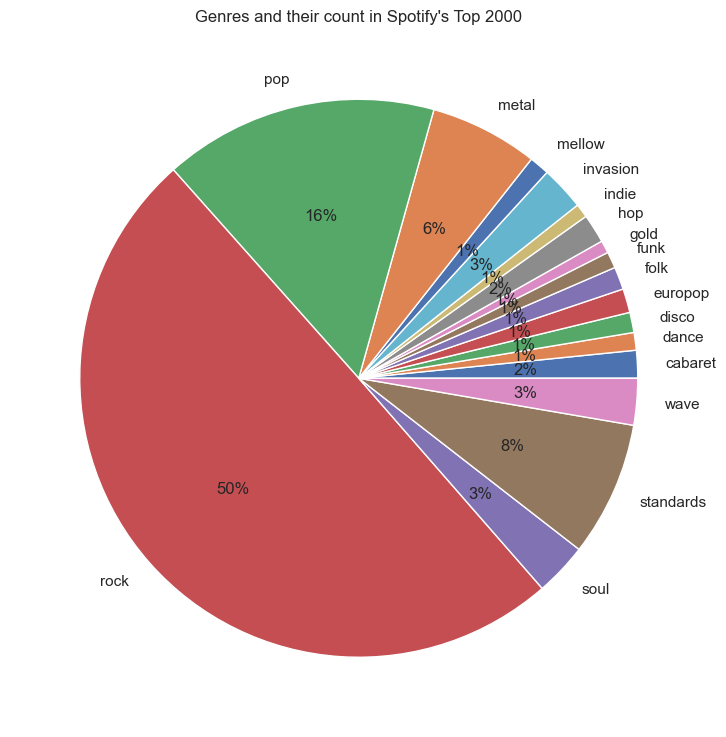

In [126]:
music_pie = music_gen[music_gen["gen_count"] >= 10] #We know that genres with less than 10 entries 
#won't be very prevalent in the data
plt.figure(figsize = (9,10))
plt.pie(music_pie["gen_count"], labels = music_pie["Top Genre"], autopct='%.0f%%');

plt.title("Genres and their count in Spotify's Top 2000")

The most prevalent genres we can see from the visualization are pop, and, surprisingly, at a whooping 55%, *rock*! This, however, actually makes a lot of sense; rock is actually one of the most listend to genres, and it could always be a fusion of pop, metal, or more. Rock as a genre is very malleable, so its prevalence in the Spotify Top 2000 is warranted. 

However, what I want to also analyze is whether or not these genres are also **popular**. To display this, i am going to create a cat plot displaying each genre and its popularity using bar plots!

Text(0.5, 1.0, 'Genre vs Mean of Popularity')

<Figure size 500x500 with 0 Axes>

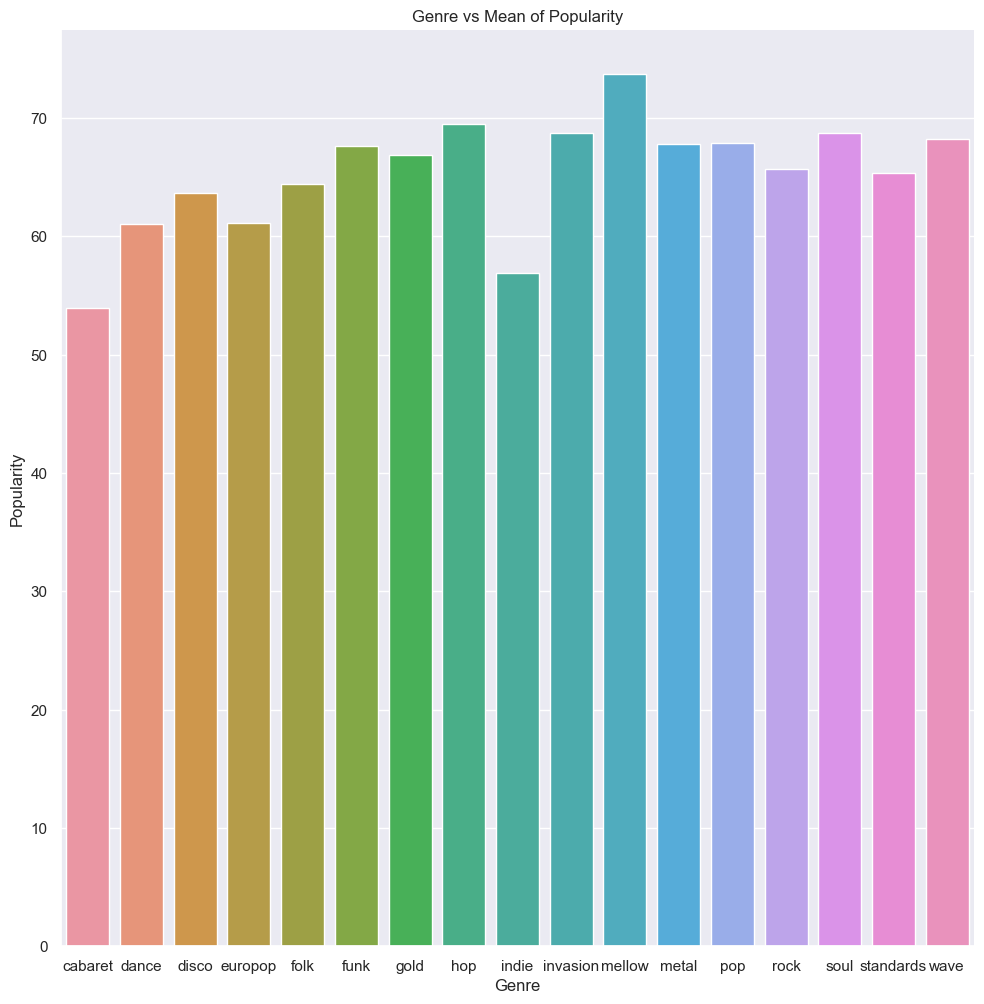

In [152]:
plt.figure(figsize = (5, 5))
sns.catplot(
    data= music_pie, x="Top Genre", y="mean_pop",
    kind="bar", height=10 
)

plt.xlabel('Genre');
plt.ylabel('Popularity');
plt.title('Genre vs Mean of Popularity')

It makes sense that most of the songs have a popularity above 50; but, what I didn't expect is the most popular genre to be mellow! This does make sense though; mellow music is good background music for people to listen to while sleeping, doing exercise or yoga, or even wanting to calm down.

## Music Through the Ages

Next, I want to compare the changes in music over the years. The first thing I want to compare is tempo. What I want to know is how much tempo will change based on time throughout the years. I'm going to once again group by year this time, and create a plot visualizaing the change in tempo. 

In [14]:
music_stat = newmusic_df.groupby(["Year"]).agg(
    mean_BPM = ("Beats Per Minute (BPM)", "mean"),
    median_BPM = ("Beats Per Minute (BPM)", "median")
).reset_index()
music_stat.head(3)

,Year,mean_BPM,median_BPM
0,1956,95.000000,95.0
1,1958,144.600000,167.0
2,1959,158.333333,168.0


<AxesSubplot: xlabel='Year', ylabel='mean_BPM'>

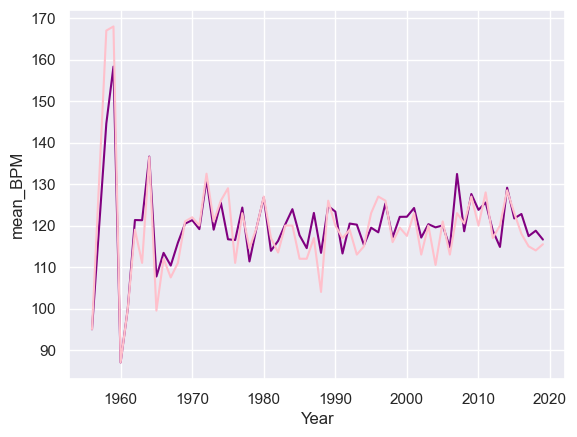

In [140]:
sns.lineplot(data = music_stat, x = "Year", y = "mean_BPM", color = "purple")
sns.lineplot(data = music_stat, x = "Year", y = "median_BPM", color = "pink")

Wow! Interestingly, we can see that tempo varied wildly suring the 1950s-1960s. We can mostly likely attribute this to a lot of musical development at that time; from jazz, the birth of rock and roll, and the Beatles, a lot of shifts in music we know today occurred during that time. 

### Danceability and the Years 


We always hear how only dance music is booming nowadays, but is that actually true? I want to use a KDE plot to show the distribution of dancebility in the data, and see whether or not it correlates at all to the general dsitribution of the years. I am going to create a kde plot that maps out distribution of danceability in regards to year, and see how the general distibutions of dabceability fare. 

<AxesSubplot: xlabel='Year', ylabel='Danceability'>

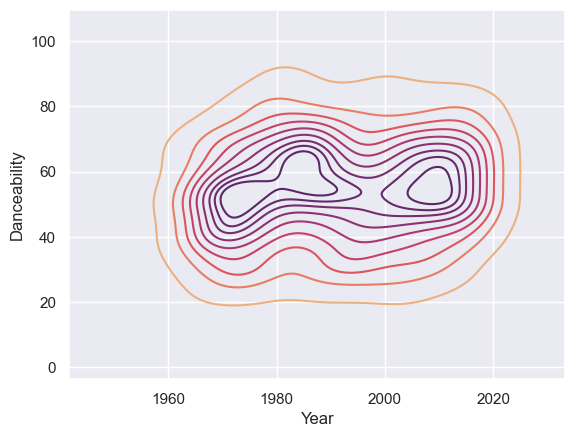

In [156]:
sns.kdeplot(data=newmusic_df, x="Year", y = "Danceability", cmap="flare")

Interesting! It seems that there is a general distribution of regular danceability (that is, danceability that is neither above or below 50) between the years of 1970-1985 and the mid-2000s. This makes sense in regards to the eras of the time; again, the 1960s to 1980s were a large period of growth for the musical genre, and welcomes many different styles that can either not be danced to or danced to, such as funk, blues, metal, and more (<a href="https://www.readersdigest.co.uk/culture/music/the-evolution-of-music-the-music-revolution-of-the-1960s">Source</a>). It's no wonder that music would neither be danceable or undanceable when there is a plethora to choose from! The 2000s was also a large change in music in general. The advent of streaming, internet, and more made the popularity of different genres explode (<a href="https://www.readersdigest.co.uk/culture/music/the-evolution-of-music-the-music-revolution-of-the-1960s">Source</a>). In general, it makes sense for both of these decades to be so centralized and in mid-danceability; new advents in time mean new advents in music as well! 



### Popularity of the ages

The last thing I want to look at is the general popularity of different years in music. I want to figure out, out of these Top songs, which ones are modern or which ones are still being played, years after their release. First, I'll create a new dataset to group mean popularity by year, and then plot it using a scatter plot, which is usually used to represent two different numeric values. 

In [118]:
music_year = newmusic_df.groupby(["Year"]).agg(
    pop_mean = ("Popularity", "mean"), 
).reset_index()

Text(0.5, 1.0, 'Year vs Mean of Popularity')

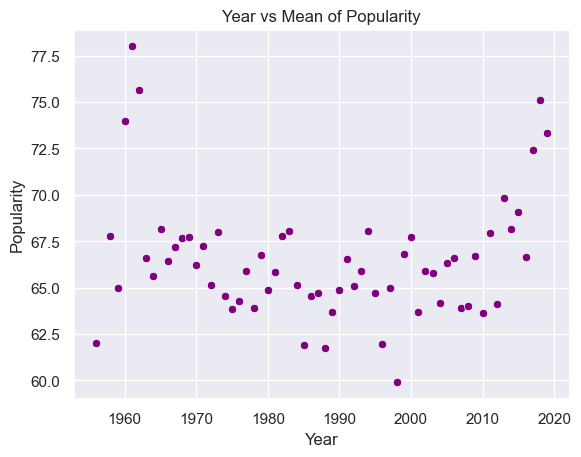

In [157]:
sns.scatterplot(
    data= music_year, x="Year", y="pop_mean", color = "purple")

plt.xlabel('Year');
plt.ylabel('Popularity');
plt.title('Year vs Mean of Popularity')

Wow! Interestingly, the most popular time periods seem to be near the end of the 2010s and the 1960s. Since this dataset is from 2020, it makes sense that we don't see any values after that year, because there is no data to collect from after 2020 yet. Still, it's interesting to see this sudden spike in the 1960s; however, it makes complete sense when we add historical context. Some of the top-selling artists include many from the 1960s: The Beatles and Elvis Presley come to mind immediately (<a href="https://www.businessinsider.com/best-selling-music-artists-of-all-time-2016-9#6-michael-jackson-89-million-units-45">Source</a>). It also makes sense for the popularity to spike more as recent years are added; after all, on Spotify itself, artists like Drake, Bad Bunny, and BTS are all late 2010s to 2020s artists and are known to be the most streamed on Spotify in general(<a href="https://chartmasters.org/most-streamed-artists-ever-on-spotify/">Source</a>). Thus, it's interesting to see how this popularity is visualized, and also how the dataset corroborates with other statistics done with Spotify and music! 


## Heatmap to find more correlations

As my last data visualization, I want to find general correlations between the data and its variables. I'll be using a heat map to better display the different areas of correlation and any significantly correlated values. This way, I can find many different types of correlations that can add to the visualizations done previously, or it can show correlations that may not have been noticed before. 

First, I am going to create a new dataframe and delete the thousand comma operator as well as values that may inhibit correlation, such as Year, Artist, or Genre. We know these won't correlate to certain values because we aren't looking at every single data point individually, so I am dropping their columns. 

In [163]:
heatmusic = newmusic_df.drop(columns=['Title', 'Artist', 'Top Genre', 'Year'])
heatmusic['Length (Duration)'] = heatmusic['Length (Duration)'].str.replace(',','') #I'm deleting the thousand comma operater here
heatmusic['Length (Duration)'] = pd.to_numeric(heatmusic['Length (Duration)'])

<AxesSubplot: >

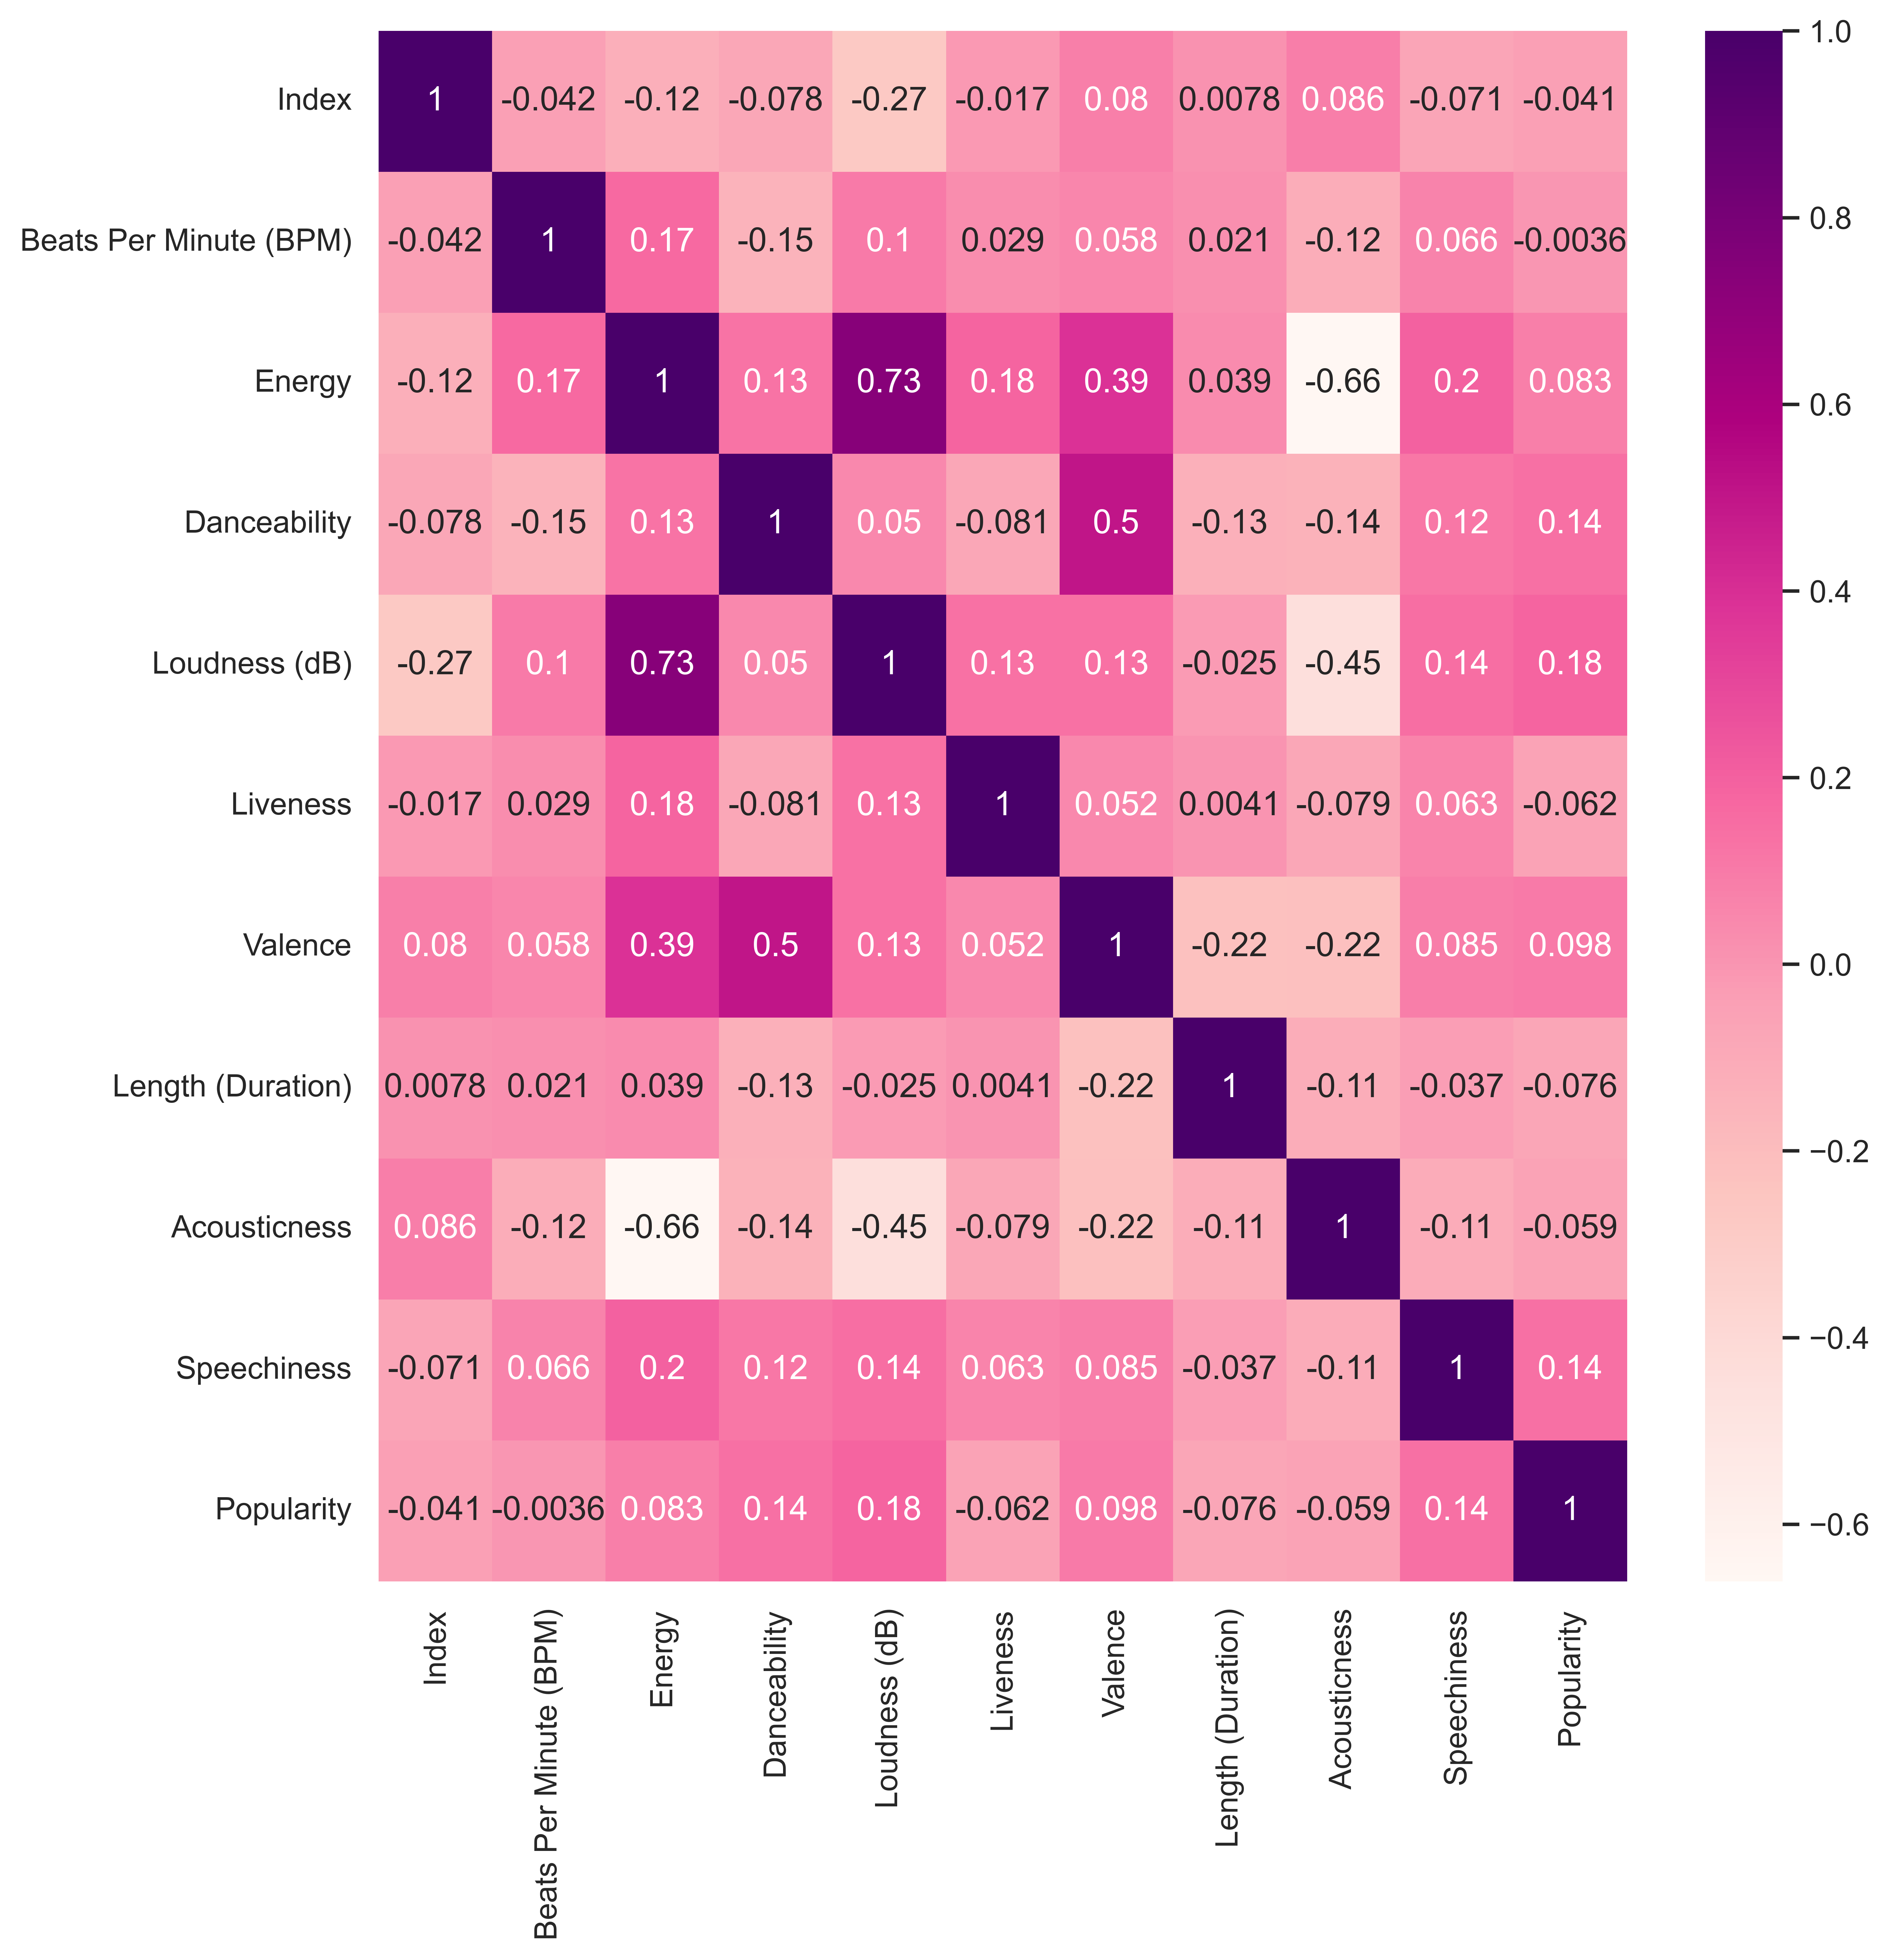

In [164]:
plt.figure(figsize=(10, 10),dpi=600)
sns.heatmap(heatmusic.corr(), annot=True, cmap="RdPu")

From the data, I can see a very strong correlation between loudness and energy at a whooping 0.73! This makes sense: energy often brings loud emotions, so decibels may be raised. Valence and energy seem to have a correlation of 0.39, and valence and danceability have a correlation of 0.5; the same logic applies here as with energy and loudness, where a more positive mood will bring more energy, and more positive mood also means that a person would be more inclined to dance. What's interesting is that BPM has a negative correlation with danceability, as I thought that a rhythm is integral to dance. However, this could also be that as a bpm gets higher, it becomes more difficult to dance to a song, thus causing a negative correlation. 

In addition to that, correlations are low for popularity and most other variables; this goes to show that popularity might not have large trends we can see, or that it depends on specifics in different genres and groups. A song can be popular depending on its genre and the type of people it attracts, so different songs can be popular or unpopular for different reasons. 

## More Analyses: Machine Learning with Spotify

One of the points discussed in the introduction is how Spotify uses algorithms and machine learning to determine what is best to recommend to a listener. Spotify does this through reinforcement learning, which is basically having the computer learn and make decisions in a complex, uncertain environment (<a href="https://mitsloan.mit.edu/ideas-made-to-matter/how-wayfair-and-spotify-use-machine-learning-to-engage-customers">Source</a>). 

Unfortunately, we were not able to learn about reinforcement learning in class, so instead I am going to do a few different analyses here. First, I'll use a random forest classifier, which is under supervised learning, which can be used to classify the data based on its genre that builds decision trees and overfits, making it a better option that KNieghbors Classifier in terms of prediction accuracy. In addition, I will not include unsupervised learning, since that looks more for structure within the data set rather than classification, and while reinforcement learning is neither supervised nor unsupervised, for the purpose of classifying a genre, I will be using a supervised learning method. 


In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
random_forest = RandomForestClassifier()

In [169]:
#Creating y labels and the x fetures that will help classify and predict
labels_y = newmusic_df['Top Genre']
#deleting columns that will not help in classifiction (Year, Index, etc. are not useful for finding a genre)
features_X = newmusic_df.drop(columns = ['Title', 'Artist', 'Top Genre', 'Index', 'Year']) 
features_X['Length (Duration)'] = features_X['Length (Duration)'].str.replace(',','')
features_X['Length (Duration)'] = pd.to_numeric(features_X['Length (Duration)'])


features_X.head(3) #Printing x_features to make sure it works 

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,201,94,3,71
2,168,69,66,-9,7,52,341,2,17,69
3,173,96,43,-4,3,37,269,0,4,76


In [170]:
forest_scores = cross_val_score(random_forest, features_X, labels_y, cv = 5)

print(forest_scores.mean())

/Users/estelle/opt/anaconda3/envs/ydata123_env_2023e1/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.4367892976588629


With a cross value of 5, we find a 43.67% prediction rate. While this may not seem the best as of right now, we do have to understand that this isn't exactly how Spotify actually uses its machine learning algorithms, and the classifier is still much better than the other method of picking randomly and choosing. While it is not the best prediction rate, it gives a glimpse into how machine learning can algorithmically help systems like Spotify. With something as powerful as reinforcement learning, classifying what the listener wants to hear should be easy for Spotify! 

## Conclusions

My findings show how there seems to be interesting trends in the popularity and prevalence of music, its genre, and possibly other variables with it. Contrary to popular notion, rock seems to be an extremely prominent genre, no doubt because of its malleability and its ability to blend with any kind of genre, instruments, or emotion possible. And even then, mellow music is actually quite popular, possibly owing to its soothing vibes! 

In addition, the data visualizations showed the changes in music throughout the years; things such as tempo can change drastically or not throughout the years, and displays a shift in culture and prevalence of songs. Danceability seems to have always stayed consistent throughout the years, and we can see from our data visualizations how culture shifted through music over time. In fact, I would go so far as to say that it corroborates and dissuades some popular notions: kings of rock like Elvis and the Beatles are still popular to this day, as they are always seen as, and it also shows that music hasn't just changed because of youth or that it isn't as popular good as before, but also because of general cultural shifts, and that music is possibly just as popular as it once was, and it consistently is! 

I think that it's really interesting how we can see that valence, or the positive emotions of a song, do actually correlate to its danceability, and that loudness does affect how energetic a song is! It's interesting to see that these different variables often associated with each other also hold strong correlation when it is shown visually, and this is generally also because of the nature of these different properties. 

Lastly, while the random forest classifier did not gice the best result it could offer, it did show how a machine learning algorithm could help Spotify in aiding its listeners, and possibly even tell us how genre isn't the only classifier we need for recommendation, but a multitude of different factors. 

Through this, we can prove that even though music may not seem to be important to analyze, it can actually reveal a lot about how it affects our everyday life. We have seen that, through cultural shifts in history, such as the internet or the tumultuous era of change in the 1960s, music has also grown, and shown differences in us as humans. 

## Reflection
  

Overall, I enjoyed the project and analyzing the Spotify data! As of right now, I would like to exapnd my knowledge on machine learning to actually be able to use reinforcement learning with the Spotify data. Something that is also interesting to notw is that Pandas and other types of data visualizations also offer ways to use machine learning in regards to actual sound and their variables, not only numbers. I would love to be able to have the ability to visualizae sound waves, and possibly use that in conjunction with reinforcement learning! 

Some machine learning I did not include was KMeans clustering and hierarchial structuring. Again, while these are interesting machine learning techniques, they did not fit with the theme of the project and what I set out to do. In addition, hypothesis tests were also not conducive to what I set out for my goals, since I was not predicting straight proportions. 

In conclusion however, I really enjoyed the project overall, and I can't wait for what my Data Science journey has in store for me next! 
